##### Principal Component Analysis (PCA) in Python

Learn about PCA and how it can be leveraged to extract information from the data without any supervision using two popular datasets: Breast Cancer and CIFAR-10.

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

For information : https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [23]:
## Import the librairies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset 
from sklearn.datasets import load_breast_cancer
breast=load_breast_cancer()
breast_data=breast.data

In [3]:
# shape 
breast_data.shape

(569, 30)

In [4]:
# labels/target
breast_labels=breast.target

In [5]:
breast_labels.shape

(569,)

Now you will import numpy since you will be reshaping the breast_labels to concatenate it with the breast_data so that you can finally create a DataFrame which will have both the data and labels.

In [6]:
labels=np.reshape(breast_labels,(569,1))

In [9]:
labels[2]

array([0])

After reshaping the labels, you will concatenate the data and labels along the second axis, which means the final shape of the array will be 569 x 31

In [10]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [11]:
final_breast_data.shape

(569, 31)

Now you will import pandas to create the DataFrame of the final data to represent the data in a tabular fashion.

In [12]:
breast_dataset = pd.DataFrame(final_breast_data)

Let's quickly print the features that are there in the breast cancer dataset!

In [13]:
features = breast.feature_names

In [14]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

If you note in the features array, the label field is missing. Hence, you will have to manually add it to the features array since you will be equating this array with the column names of your breast_dataset dataframe.

In [15]:
features_labels = np.append(features,'label')

Great! Now you will embed the column names to the breast_dataset dataframe.

In [16]:
breast_dataset.columns = features_labels

In [17]:
# first few rows 
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
breast_dataset.shape

(569, 31)

In [19]:
breast_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
# Let's replace the label (0, 1) by benign and malignant 
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [21]:
# tail()
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


#### CIFAR - 10 Data Exploration

Next, you'll explore the CIFAR - 10 image dataset

ou can load the CIFAR - 10 dataset using a deep learning library called Keras.

In [25]:
from keras.datasets import cifar10

In [26]:
# X_train, X_test, y_train, y_test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 58s 0us/step


In [27]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [28]:
# Let's also print the shape of the labels
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [31]:
# let's also find out the total number of labels and the various kinds of 
# classes the data has 

# Find the unique numbers from the train labels
classes=np.unique(y_train)
nclasses=len(classes)
print('Total number of outputs :', nclasses)
print('Oupout classes :', classes)

Total number of outputs : 10
Oupout classes : [0 1 2 3 4 5 6 7 8 9]


Now to plot the CIFAR-10 images, you will import matplotlib and also use a magic (%) command %matplotlib inline to tell the jupyter notebook to show the output within the notebook itself!

In [32]:
%matplotlib inline

For a better understanding, let's create a dictionary that will have class names with their corresponding categorical class labels.

In [33]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


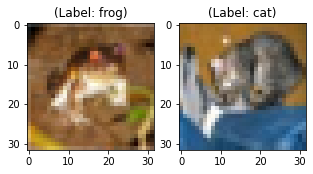

In [34]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

Even though the above two images are blurry, you can still somehow observe that the first image is a frog with the label frog, while the second image is of a cat with the label cat

##### Data Visualization using PCA

Now comes the most exciting part of this tutorial. As you learned earlier that PCA projects turn high-dimensional data into a low-dimensional principal component, now is the time to visualize that with the help of Python!

##### Visualizing the Breast Cancer data

 - You start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.

 - It is a common practice to normalize your data before feeding it to any machine learning algorithm.

- To apply normalization, you will import StandardScaler module from the sklearn library and select only the features from the breast_dataset you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing fit_transform on the feature data.

While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [35]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [36]:
x.shape

(569, 30)

In [37]:
# Let's check whether the normalized data has a mean of zero and 
# standard deviation of one 
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [38]:
# Let's convert the normalized features into a tabular format with 
# the help of DataFrame 
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [39]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [40]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


- Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components

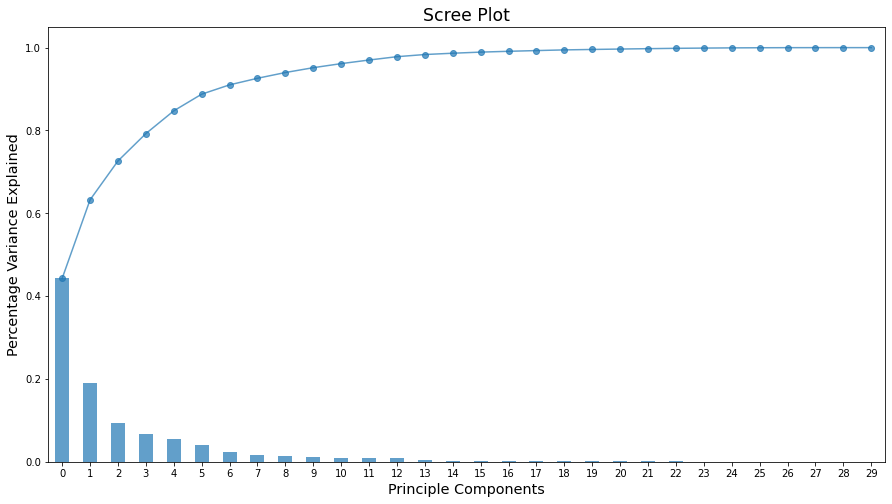

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(normalised_breast)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

As figure shows, the best number of components for our PCA is 2,it describes the data best.Preserving 80% of the data’s variance.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data

In [44]:
#from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(normalised_breast)

Next, let's create a DataFrame that will have the principal component values for all 569 samples.

In [45]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [46]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


- Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [47]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost

Let's plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

<Figure size 432x288 with 0 Axes>

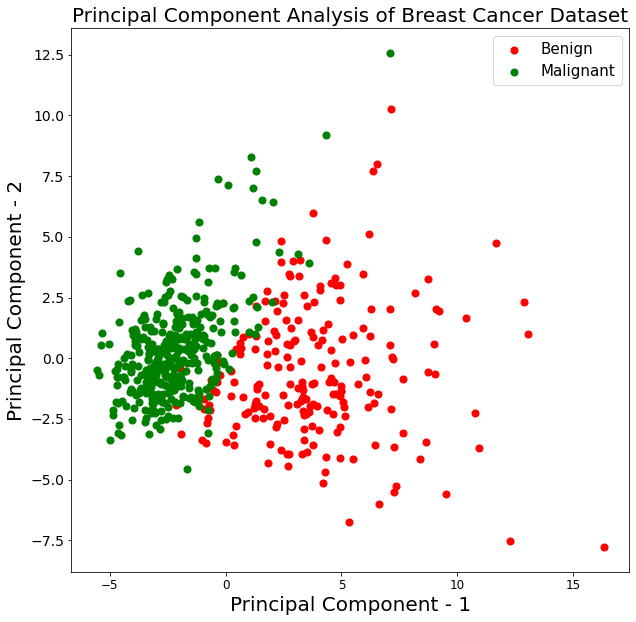

In [48]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

#### Visualizing the CIFAR - 10 data

The following lines of code for visualizing the CIFAR-10 data is pretty similar to the PCA visualization of the Breast Cancer data.

- Let's quickly check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.

In [49]:
np.min(x_train),np.max(x_train)

(0, 255)

In [50]:
x_train = x_train/255.0

In [51]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [52]:
x_train.shape

(50000, 32, 32, 3)

Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

But before that, let's reshape the image dimensions from three to one (flatten the images).

In [53]:
x_train_flat = x_train.reshape(-1,3072)

In [54]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [55]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [56]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


Perfect! The size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073

PCA will be applied on all the columns except the last one, which is the label for each image.

In [57]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


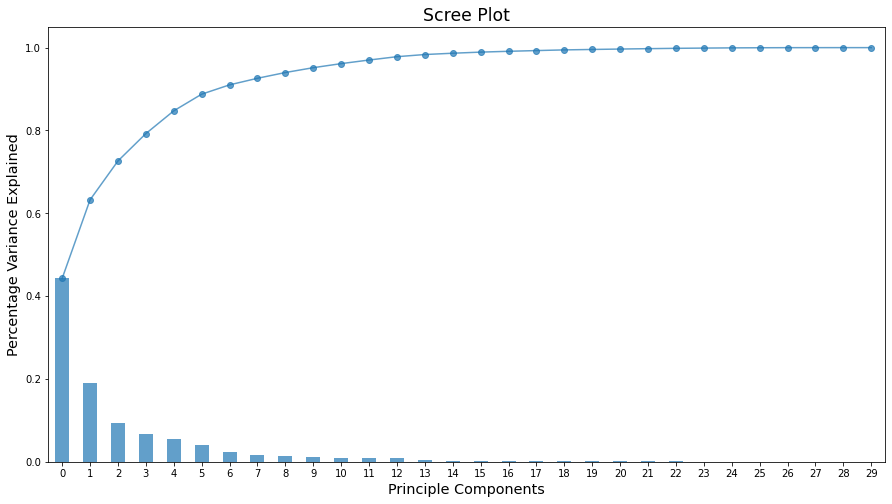

In [58]:
pca_cifar = PCA()
pca_cifar.fit(df_cifar)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

Next, you will create the PCA method and pass the number of components as two and apply fit_transform on the training data, this can take few seconds since there are 50,000 samples

In [59]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [60]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [61]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


Let's quickly find out the amount of information or variance the principal components hold.

In [62]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.

Its time to visualize the CIFAR-10 data in a two-dimensional space. Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a two-dimensional space. The differences between them might not be captured that well.

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

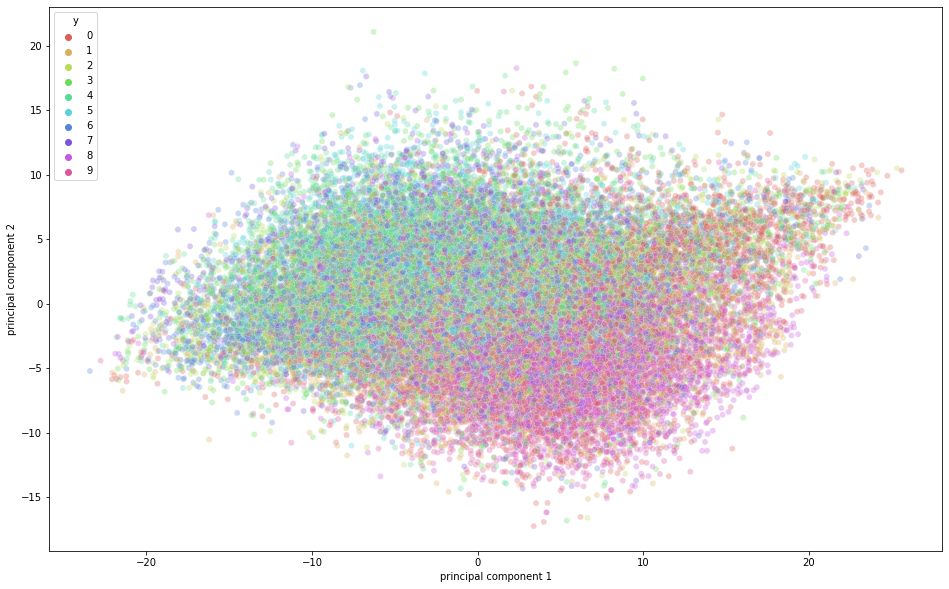

In [63]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

##### Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset

In this final segment of the tutorial, you will be learning about how you can speed up your Deep Learning Model's training process using PCA.

First, let's normalize the training and testing images. If you remember the training images were normalized in the PCA visualization part, so you only need to normalize the testing images. So, let's quickly do that!

In [64]:
x_test = x_test/255.0

In [65]:
x_test = x_test.reshape(-1,32,32,3)

In [66]:
# Let's reshape the test data
x_test_flat = x_test.reshape(-1,3072)

Next, you will make the instance of the PCA model.

Here, you can also pass how much variance you want PCA to capture. Let's pass 0.9 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the number of components required to capture 90% variance will be used.

Note that earlier you passed n_components as a parameter and you could then find out how much variance was captured by those two components. But here we explicitly mention how much variance we would like PCA to capture and hence, the n_components will vary based on the variance parameter.

If you do not pass any variance, then the number of components will be equal to the original dimension of the data.

In [67]:
pca = PCA(0.9)

Then you will fit the PCA instance on the training images

In [68]:
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now let's find out how many n_components PCA used to capture 0.9 variance.

In [69]:
pca.n_components_

99

From the above output, you can observe that to achieve 90% variance, the dimension was reduced to 99 principal components from the actual 3072 dimensions.

Finally, you will apply transform on both the training and test set to generate a transformed dataset from the parameters generated from the fit method.

In [70]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

Next, let's quickly import the necessary libraries to run the deep learning model

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

Now, you will convert your training and testing labels to one-hot encoding vector

In [72]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Let's define the number of epochs, number of classes, and the batch size for your model

In [73]:
batch_size = 128
num_classes = 10
epochs = 20

Next, you will define your Sequential model

In [74]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Let's print the model summary.

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              102400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


Finally, it's time to compile and train the model!

In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.6308 - accuracy: 0.4195 - val_loss: 1.4357 - val_accuracy: 0.4866
Epoch 2/20
50000/50000 [==============================] - 7s 145us/step - loss: 1.3189 - accuracy: 0.5339 - val_loss: 1.3707 - val_accuracy: 0.5077
Epoch 3/20
50000/50000 [==============================] - 7s 145us/step - loss: 1.1357 - accuracy: 0.5950 - val_loss: 1.3793 - val_accuracy: 0.5337
Epoch 4/20
50000/50000 [==============================] - 7s 145us/step - loss: 0.9849 - accuracy: 0.6485 - val_loss: 1.3190 - val_accuracy: 0.5552
Epoch 5/20
50000/50000 [==============================] - 7s 145us/step - loss: 0.8358 - accuracy: 0.6993 - val_loss: 1.3827 - val_accuracy: 0.5469
Epoch 6/20
50000/50000 [==============================] - 7s 144us/step - loss: 0.6926 - accuracy: 0.7502 - val_loss: 1.5435 - val_accuracy: 0.5502
Epoch 7/20
50000/50000 [==============================] - 7s 1

From the above output, you can observe that the time taken for training each epoch was just 7 seconds on a CPU. The model did a decent job on the training data, achieving 70% accuracy while it achieved only 56% accuracy on the test dat. This means that it overfitted the training data. However, remember that the data was projected to 99 dimensions from 3072 dimensions and despite that it did a great job!

Finally, let's see how much time the model takes to train on the original dataset and how much accuracy it can achieve using the same deep learning model.

In [77]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 321us/step - loss: 2.1719 - accuracy: 0.2374 - val_loss: 1.8668 - val_accuracy: 0.3382
Epoch 2/20
50000/50000 [==============================] - 16s 316us/step - loss: 1.8394 - accuracy: 0.3366 - val_loss: 1.8541 - val_accuracy: 0.3348
Epoch 3/20
50000/50000 [==============================] - 16s 314us/step - loss: 1.7300 - accuracy: 0.3803 - val_loss: 1.6602 - val_accuracy: 0.4024
Epoch 4/20
50000/50000 [==============================] - 16s 314us/step - loss: 1.6625 - accuracy: 0.4056 - val_loss: 1.6242 - val_accuracy: 0.4228
Epoch 5/20
50000/50000 [==============================] - 16s 313us/step - loss: 1.6104 - accuracy: 0.4245 - val_loss: 1.6027 - val_accuracy: 0.4368
Epoch 6/20
50000/50000 [==============================] - 16s 314us/step - loss: 1.5650 - accuracy: 0.4432 - val_loss: 1.5768 - val_accuracy: 0.4409
Epoch 7/20
50000/50000 [==============================] 

Voila! From the above output, it is quite evident that the time taken for training each epoch was around 23 seconds on a CPU which was almost three times more than the model trained on the PCA output.

Moreover, both the training and testing accuracy is less than the accuracy you achieved with the 99 principal components as an input to the model.

So, by applying PCA on the training data you were able to train your deep learning algorithm not only fast, but it also achieved better accuracy on the testing data when compared with the deep learning algorithm trained with original training data